# Wind (Onshore) Power Data Analysis


We use the "EMHIRES dataset: wind and solar power generation data set" (cf. https://setis.ec.europa.eu/emhires-dataset-part-i-wind-power-generation_en and  https://zenodo.org/records/8340501).
The data set provides wind power time series (onshore) at hourly granularity and at a NUTS 2 (cf. the European Nomenclature of territorial  units for statistics (NUTS) defined by EUROSTAT,“EUROSTAT European Statistics,” [Online]. Available: http://ec.europa.eu/eurostat/web/nuts/history) aggregation level.

Gonzalez-Aparicio, I., Zucker, A., Careri, F., Monforti, F., Huld, T., & Badger, J. (2021). EMHIRES dataset: wind and solar power generation [Data set]. Zenodo. https://doi.org/10.5281/zenodo.8340501

 

In [141]:
import pickle
import os
import openpyxl
import plotly.express as px
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


In [47]:
##read excel file, convert to dataframe and save time step and date 
data_path = "C:/Users/Anwender/Documents/GitHub/RiVaPy_development/EMHIRES_WIND_ONSHORE_COUNTRY/EMHIRES_WIND_COUNTRY_June2019.xlsx"
wb = openpyxl.load_workbook(filename=data_path, read_only=True)
ws = wb.active
# Load the rows
rows = ws.rows
first_row = [cell.value for cell in next(rows)]
# Load the data
data = []
for row in rows:
    record = {}
    for key, cell in zip(first_row, row):
        record[key] = cell.value
    data.append(record)
# Convert to a df
df_COUNTRIES = pd.DataFrame(data)
print("df done")
df_COUNTRIES.head()
#df.to_pickle("C:/Users/Anwender/Documents/GitHub/RiVaPy_development/EMHIRES_WIND_ONSHORE_COUNTRY/EMHIRES_WIND_COUNTRY_June2019.pkl")
#print("pickle done")

ts_date_mapping = df_COUNTRIES.filter(regex='Date|Time_step')


df done


In [38]:
##read excel file, convert to dataframe and pickle
data_path = "C:/Users/Anwender/Documents/GitHub/RiVaPy_development/EMHIRES_WIND_ONSHORE_NUTS2/EMHIRES_WIND_NUTS2_June2019.xlsx"
wb = openpyxl.load_workbook(filename=data_path, read_only=True)
ws = wb.active
# Load the rows
rows = ws.rows
first_row = [cell.value for cell in next(rows)]
# Load the data
data = []
for row in rows:
    record = {}
    for key, cell in zip(first_row, row):
        record[key] = cell.value
    data.append(record)
# Convert to a df
df = pd.DataFrame(data)
print("df done")
df.head()

df done


Time step   AL01   AL02   AL03   AT11   AT12   AT13   AT21   AT22   AT31  \
0        1.0  0.284  0.284  0.453  0.026  0.058  0.024  0.049  0.049  0.348   
1        2.0  0.285  0.285  0.362  0.022  0.049  0.015  0.048  0.048  0.338   
2        3.0  0.262  0.262  0.285  0.015  0.038  0.006  0.060  0.060  0.298   
3        4.0  0.262  0.262  0.258  0.007  0.025  0.000  0.054  0.054  0.229   
4        5.0  0.243  0.243  0.263  0.002  0.015  0.000  0.048  0.048  0.150   

   ...   UKK3   UKK4   UKL1   UKL2   UKM5   UKM6   UKM7   UKM8   UKM9   UKN0  
0  ...  0.198  0.284  0.501  0.390  0.174  0.477  0.042  0.241  0.241  0.292  
1  ...  0.094  0.177  0.425  0.332  0.232  0.496  0.068  0.274  0.274  0.219  
2  ...  0.041  0.093  0.342  0.250  0.317  0.521  0.086  0.262  0.262  0.133  
3  ...  0.035  0.050  0.261  0.127  0.429  0.556  0.097  0.221  0.221  0.062  
4  ...  0.088  0.050  0.184  0.083  0.541  0.594  0.086  0.149  0.149  0.025  

[5 rows x 300 columns]

In [68]:
df_DE = df.filter(regex='DE|Time step')
df_DE.head()

Time step   DE11   DE12   DE13   DE14   DE21   DE22   DE23   DE24   DE25  \
0        1.0  0.074  0.024  0.033  0.033  0.128  0.359  0.205  0.121  0.174   
1        2.0  0.054  0.020  0.035  0.035  0.090  0.337  0.173  0.117  0.133   
2        3.0  0.035  0.015  0.040  0.040  0.039  0.306  0.129  0.103  0.091   
3        4.0  0.017  0.010  0.049  0.049  0.008  0.224  0.075  0.084  0.049   
4        5.0  0.007  0.008  0.074  0.074  0.001  0.150  0.038  0.067  0.023   

   ...   DEB1   DEB2   DEB3  DECOO   DED2   DED4   DED5   DEE0   DEF0   DEG0  
0  ...  0.012  0.010  0.006  0.101  0.036  0.071  0.038  0.051  0.413  0.026  
1  ...  0.015  0.009  0.004  0.120  0.032  0.072  0.037  0.049  0.372  0.030  
2  ...  0.015  0.008  0.003  0.146  0.031  0.074  0.040  0.056  0.339  0.034  
3  ...  0.010  0.005  0.001  0.175  0.032  0.070  0.042  0.070  0.325  0.038  
4  ...  0.005  0.003  0.000  0.189  0.033  0.064  0.042  0.079  0.322  0.041  

[5 rows x 39 columns]

In [69]:
frames = [ts_date_mapping, df_DE]
result = pd.concat(frames,axis = 1)
result = result.drop('Time_step', axis=1)
result.head()

result.to_pickle("C:/Users/Anwender/Documents/GitHub/RiVaPy_development/EMHIRES_WIND_ONSHORE_NUTS2/EMHIRES_WIND_NUTS2_June2019_DE.pickle")

In [3]:
df_DE = pd.read_pickle("C:/Users/Anwender/Documents/GitHub/RiVaPy_development/EMHIRES_WIND_ONSHORE_NUTS2/EMHIRES_WIND_NUTS2_June2019_DE.pickle")
df_DE.head()

print(df_DE)

             Date  Time step   DE11   DE12   DE13   DE14   DE21   DE22   DE23  \
0      1986-01-01        1.0  0.074  0.024  0.033  0.033  0.128  0.359  0.205   
1      1986-01-01        2.0  0.054  0.020  0.035  0.035  0.090  0.337  0.173   
2      1986-01-01        3.0  0.035  0.015  0.040  0.040  0.039  0.306  0.129   
3      1986-01-01        4.0  0.017  0.010  0.049  0.049  0.008  0.224  0.075   
4      1986-01-01        5.0  0.007  0.008  0.074  0.074  0.001  0.150  0.038   
...           ...        ...    ...    ...    ...    ...    ...    ...    ...   
262966 2015-12-31   262967.0  0.001  0.002  0.002  0.002  0.002  0.000  0.000   
262967 2015-12-31   262968.0  0.001  0.002  0.006  0.006  0.001  0.000  0.000   
262968        NaT        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
262969        NaT        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
262970        NaT        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         DE24  ...   DEB1  

# Statistical Overview

In [133]:
# daily average
df_DE['Date'] = pd.to_datetime(df_DE['Date'], format='%Y-%m-%d')
df_daily = df_DE.groupby([df_DE['Date'].dt.date],as_index=False).agg(lambda x : x.mean() if x.dtype=='int64' else x.head(1))

print(df_daily)


            Date  Time step   DE11   DE12   DE13   DE14   DE21   DE22   DE23  \
0     1986-01-01        1.0  0.074  0.024  0.033  0.033  0.128  0.359  0.205   
1     1986-01-02       25.0  0.166  0.174  0.275  0.275  0.080  0.013  0.086   
2     1986-01-03       49.0  0.430  0.526  0.511  0.511  0.254  0.155  0.300   
3     1986-01-04       73.0  0.287  0.145  0.428  0.428  0.311  0.118  0.294   
4     1986-01-05       97.0  0.183  0.161  0.155  0.155  0.299  0.215  0.231   
...          ...        ...    ...    ...    ...    ...    ...    ...    ...   
10952 2015-12-27   262849.0  0.152  0.126  0.193  0.193  0.150  0.083  0.119   
10953 2015-12-28   262873.0  0.000  0.002  0.012  0.012  0.000  0.014  0.006   
10954 2015-12-29   262897.0  0.066  0.053  0.025  0.025  0.088  0.203  0.127   
10955 2015-12-30   262921.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
10956 2015-12-31   262945.0  0.096  0.152  0.292  0.292  0.027  0.425  0.229   

        DE24  ...   DEB1   DEB2   DEB3 

## Exemplarily Analysis for NUTS 2 Region "DE71" Darmstadt

In [368]:
NUTS2 = "DE71"
##letzte 5 Jahre
#df_daily = df_daily[df_daily["Date"] >= '2011-01-01']
df = df_daily

fig = px.line(df, x="Date", y=NUTS2, title='Log. of Daily Wind (Onshore) (Acc.)',log_y = False)
fig.show()

resampled_df = df[['Date',NUTS2]].resample('7D', on='Date').mean().reset_index(drop=False)
fig = px.line(resampled_df, x="Date", y=NUTS2, title='Log. of Weekly Wind (Onshore) (Acc.)',log_y = True)
fig.show()

resampled_df = df[['Date',NUTS2]].resample('M', on='Date').mean().reset_index(drop=False)
fig = px.line(resampled_df, x="Date", y=NUTS2, title='Log. of Monthly Wind (Onshore) (Acc.)',log_y = True)
fig.show()


In [323]:
# downsample dataframe weekly
df_monthly = df.resample('M', on='Date').mean().reset_index(drop=False)

df = df_monthly.copy()
print(df)

          Date  Time step      DE11      DE12      DE13      DE14      DE21  \
0   1986-01-31      361.0  0.394903  0.355935  0.458420  0.458420  0.456774   
1   1986-02-28     1069.0  0.147643  0.116500  0.127393  0.127393  0.126357   
2   1986-03-31     1777.0  0.189032  0.179484  0.206452  0.206452  0.161323   
3   1986-04-30     2509.0  0.126833  0.099200  0.180433  0.180433  0.185767   
4   1986-05-31     3241.0  0.051323  0.033935  0.065097  0.065097  0.065032   
..         ...        ...       ...       ...       ...       ...       ...   
355 2015-08-31   259657.0  0.057581  0.043645  0.064871  0.064871  0.040677   
356 2015-09-30   260389.0  0.101567  0.073900  0.131800  0.131800  0.113367   
357 2015-10-31   261121.0  0.046871  0.036935  0.065774  0.065774  0.056226   
358 2015-11-30   261853.0  0.287167  0.242200  0.313900  0.313900  0.327267   
359 2015-12-31   262585.0  0.184839  0.170000  0.216935  0.216935  0.173903   

         DE22      DE23      DE24  ...      DEB1   

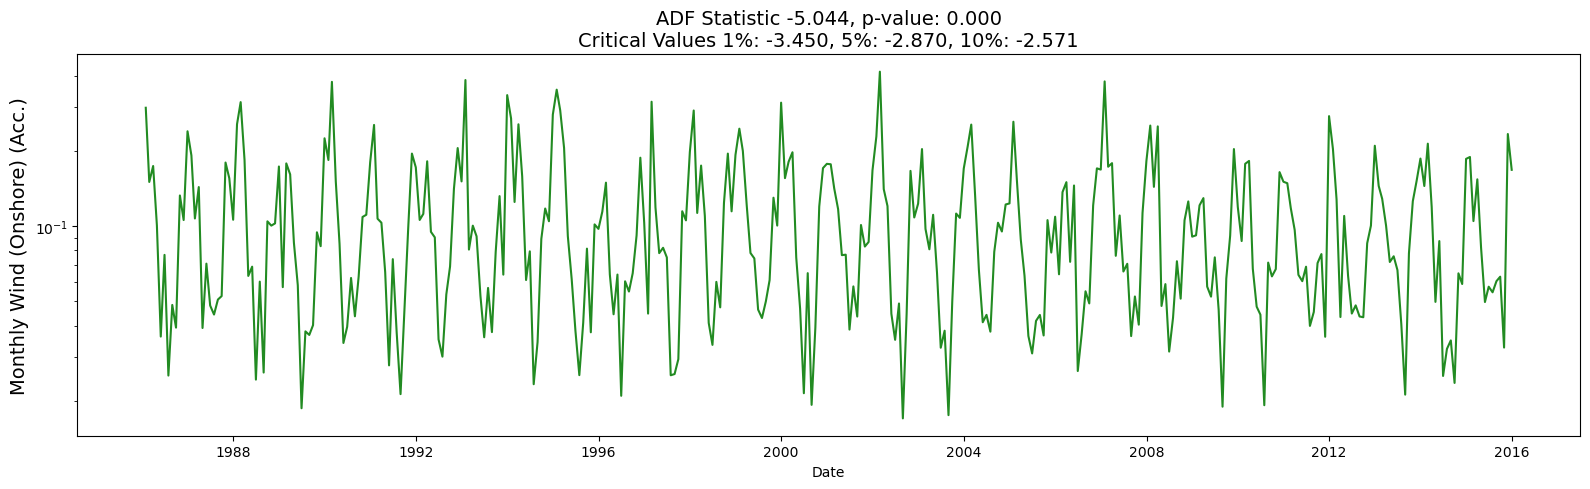

In [324]:
# check or stationarity -> Unit Root Test (ADF Test)
#Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.
#Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).
#Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).
#If the null hypothesis can be rejected, we can conclude that the time series is stationary.
#There are two ways to rejects the null hypothesis:
#On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%
#**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
#On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.
#**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

from statsmodels.tsa.stattools import adfuller

result = adfuller(df[NUTS2].values)

# Thanks to https://www.kaggle.com/iamleonie for this function!
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['Date'], y=series, ax=ax, color=linecolor)
    plt.yscale('log')
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df[NUTS2].values, 'Monthly Wind (Onshore) (Acc.)',ax)


plt.tight_layout()
plt.show()



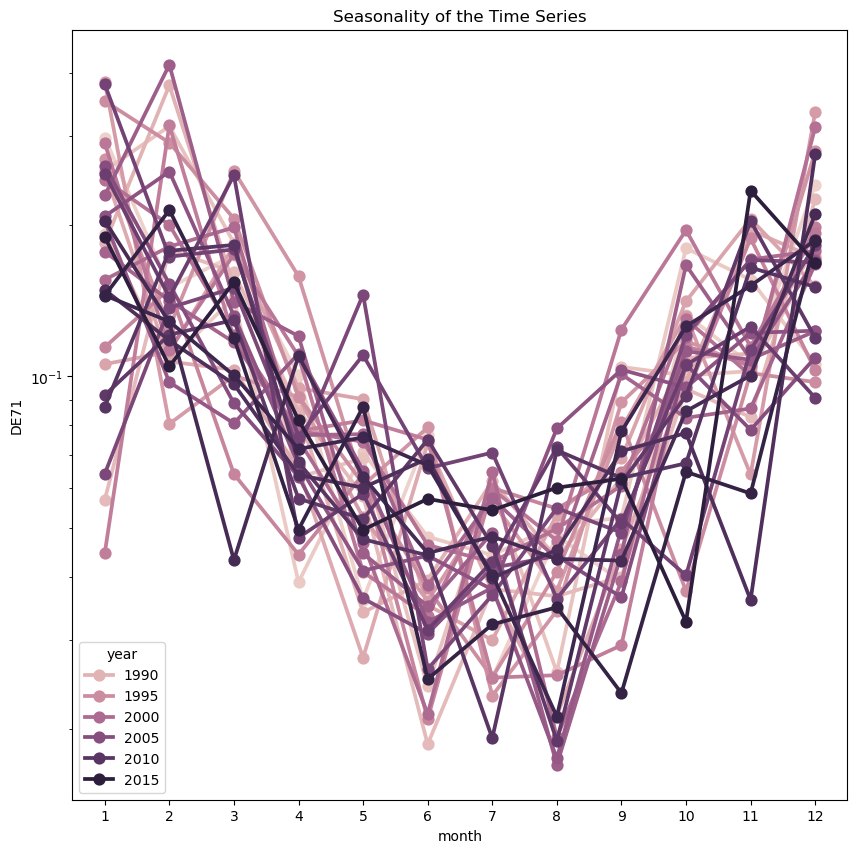

In [325]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['Date', 'year', 'month', 'day', 'day_of_year', 'quarter', 'season']].head()

# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='month',y=NUTS2,hue='year',data=df)
plt.yscale('log')

month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

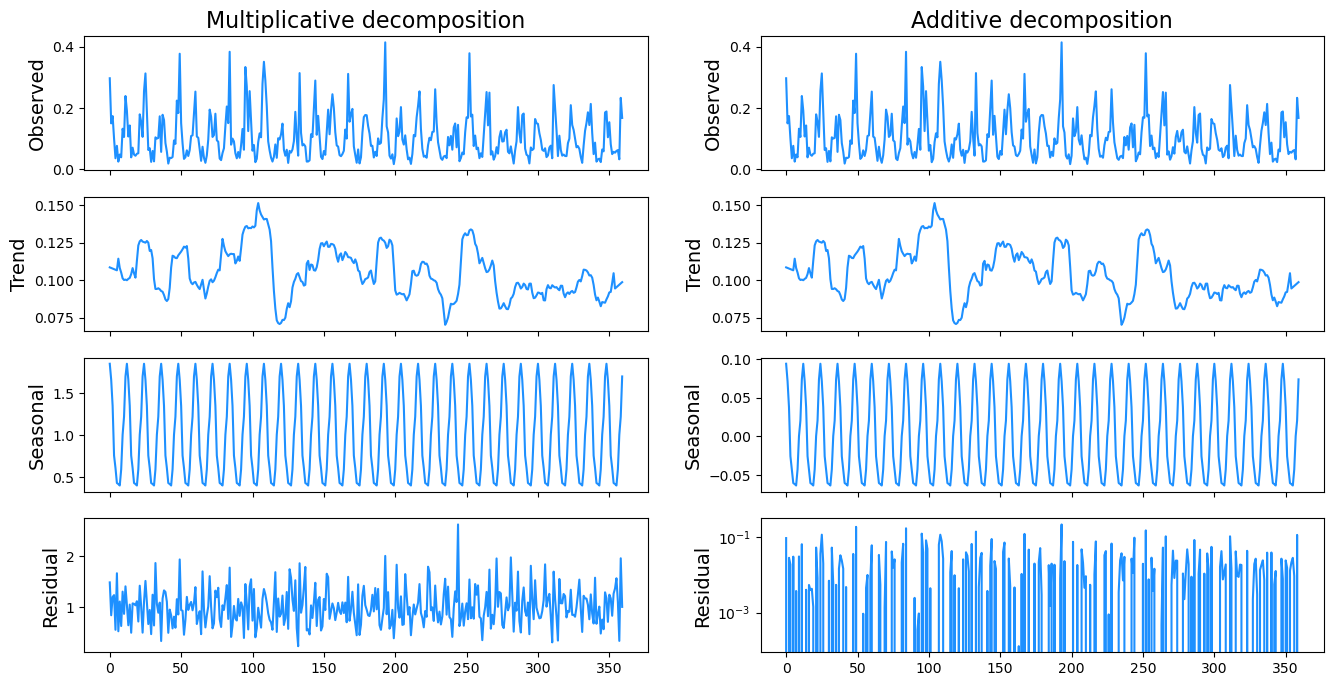

In [326]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['DE71', 'DE71']):
    
    if i == 0:
        bla = 'Multiplicative'
        res = seasonal_decompose(df[column], period=12, model='multiplicative', extrapolate_trend='freq')
    else:
        bla = 'Additive'
        res = seasonal_decompose(df[column], period=12, model='additive', extrapolate_trend='freq')


    ax[0,i].set_title(bla+' decomposition', fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)
    plt.yscale('log')

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

## Models for Univariate Time Series


In [327]:
df_selected = df[['Date',NUTS2]]


df_selected[NUTS2] = np.log(df_selected[NUTS2])
df_selected.head()

fig = px.line(df_selected, x="Date", y=NUTS2, title='Log. of Monthly Wind (Onshore) (Acc.)')
fig.show()

C:\Users\Anwender\AppData\Local\Temp\ipykernel_14412\211551295.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



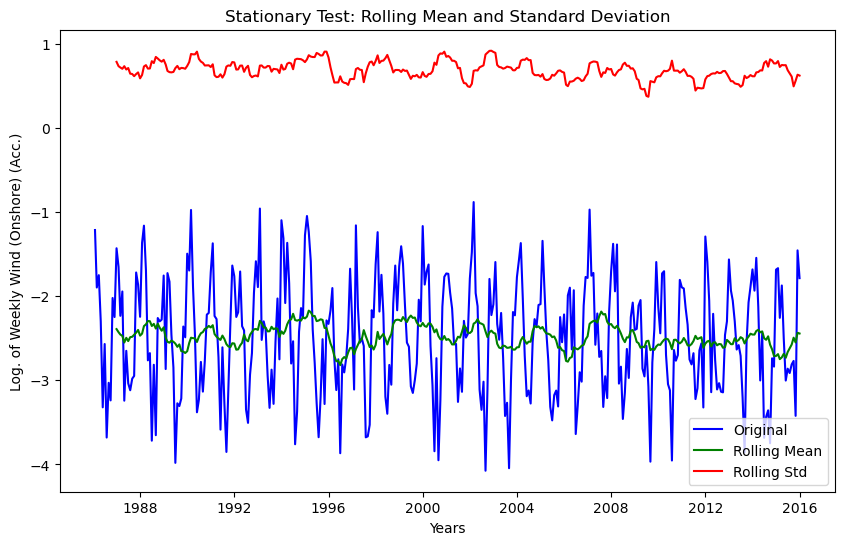

Results of Dickey-Fuller Test
Test Statistic                  -5.531666
p-value                          0.000002
#Lags Used                      17.000000
Number of Observations Used    342.000000
Critical Value (1%)             -3.449616
Critical Value (5%)             -2.870028
Critical Value (10%)            -2.571292
dtype: float64


In [328]:
def stationarity_test(timeseries,time):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('Log. of Weekly Wind (Onshore) (Acc.)')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(time,timeseries, color= 'blue', label= 'Original')
    plt.plot(time, rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(time, rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

stationarity_test(df_selected[NUTS2],df_selected['Date'])


C:\Users\Anwender\AppData\Local\Temp\ipykernel_14412\565683513.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -5.5317
p-value                          0.0000
Lags Used                       17.0000
Number of Observations Used    342.0000
Critical Value (1%)             -3.4496
Critical Value (5%)             -2.8700
Critical Value (10%)            -2.5713
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


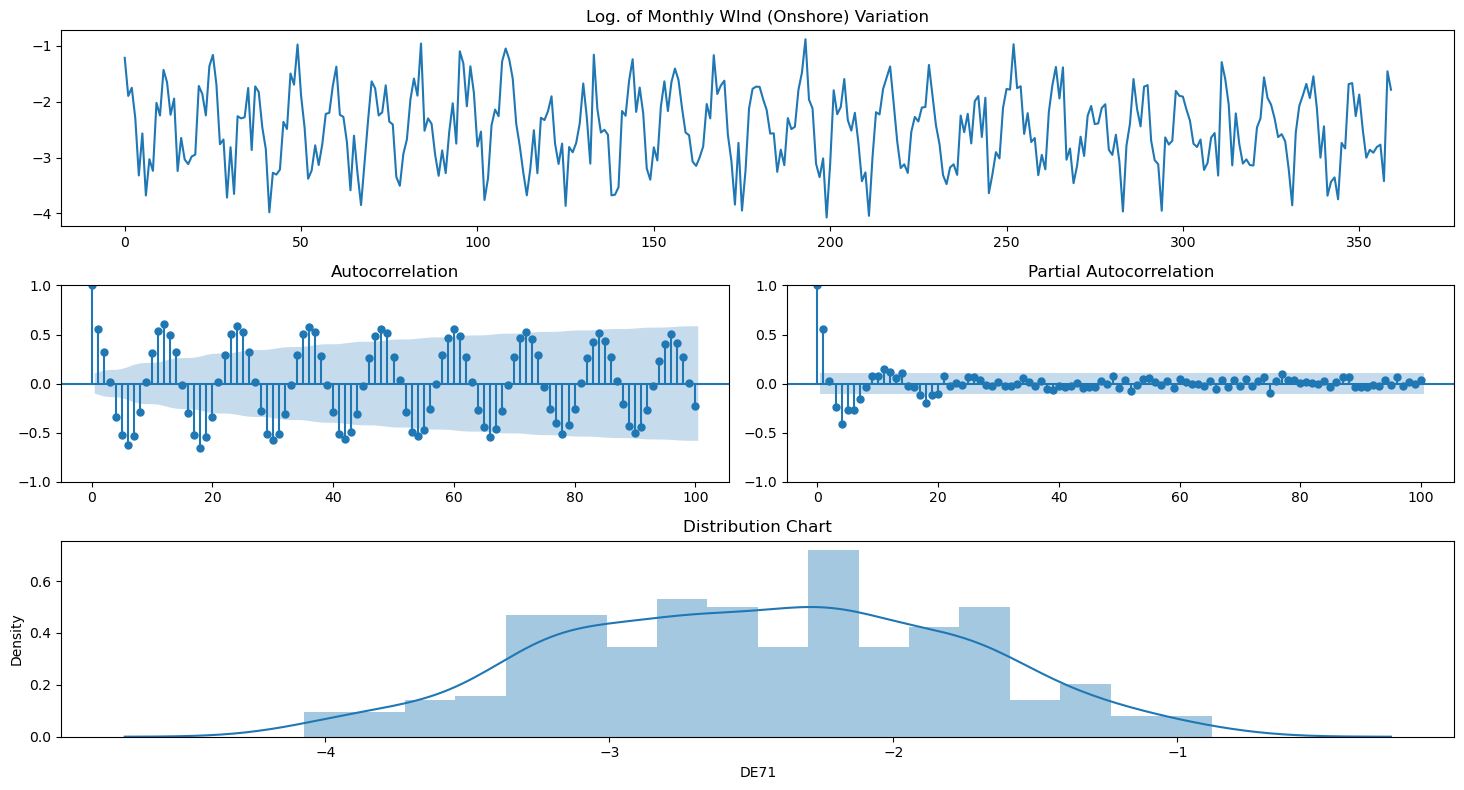

In [329]:
def check_stationarity(y, lags_plots=100, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Log. of Monthly WInd (Onshore) Variation')
    plot_acf(y, lags=lags_plots, ax=ax2);
    plot_pacf(y, lags=lags_plots, ax=ax3);
    sns.distplot(y, bins=int(np.sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = np.round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

check_stationarity(df_selected[NUTS2])

C:\Users\Anwender\AppData\Local\Temp\ipykernel_14412\565683513.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -5.5362
p-value                          0.0000
Lags Used                       16.0000
Number of Observations Used    342.0000
Critical Value (1%)             -3.4496
Critical Value (5%)             -2.8700
Critical Value (10%)            -2.5713
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


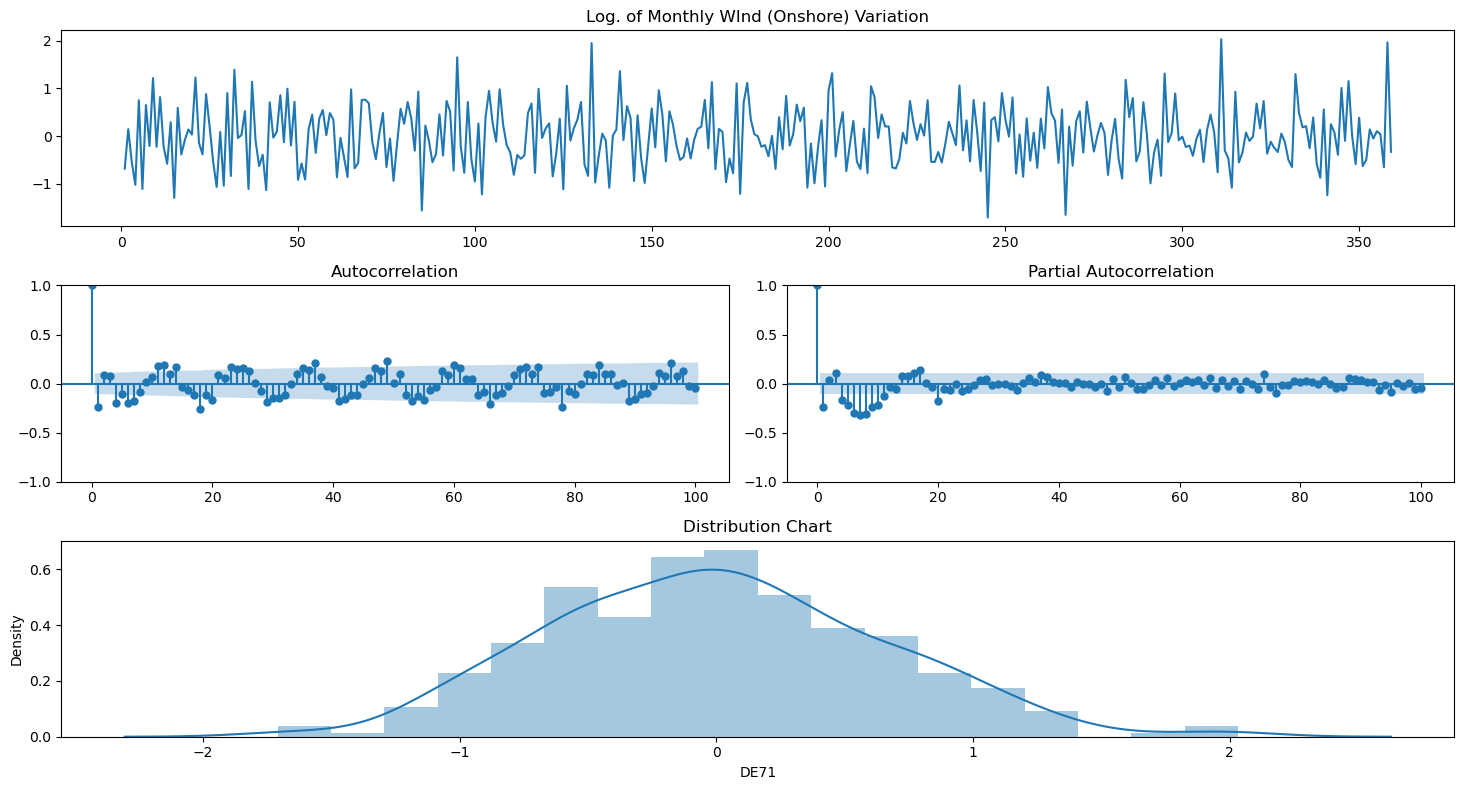

In [330]:
check_stationarity(df_selected[NUTS2].diff(1).dropna())

C:\Users\Anwender\AppData\Local\Temp\ipykernel_14412\565683513.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -8.1907
p-value                          0.0000
Lags Used                       11.0000
Number of Observations Used    336.0000
Critical Value (1%)             -3.4500
Critical Value (5%)             -2.8702
Critical Value (10%)            -2.5714
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


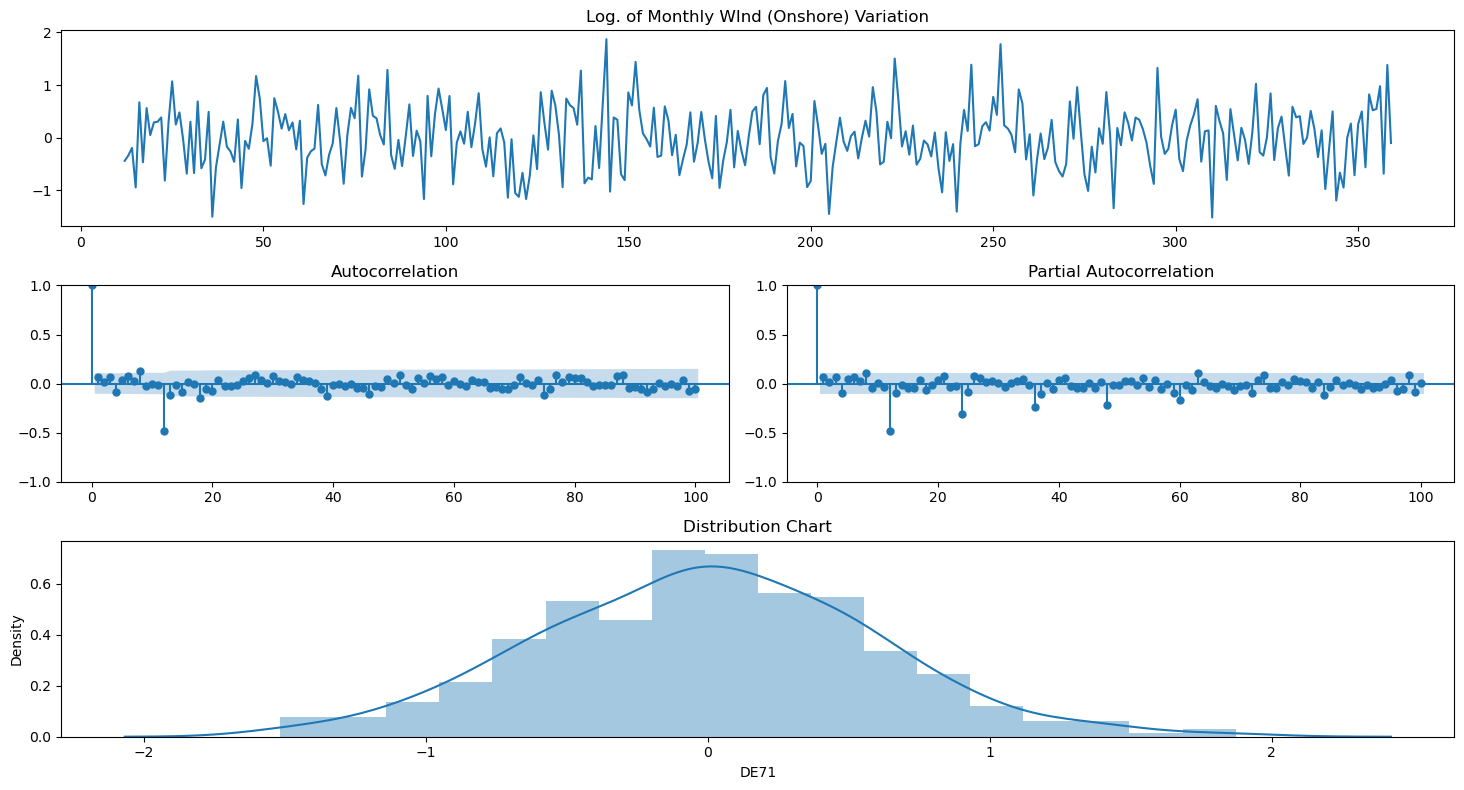

In [331]:
check_stationarity(df_selected[NUTS2].diff(12).dropna())

In [332]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = df_selected[0:int(len(df_selected)*0.9)], df_selected[int(len(df_selected)*0.9):]


train_arima = train_data[NUTS2]
test_arima = test_data[NUTS2]


history = [x for x in train_arima]
y = test_arima
print(y)
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[324])

# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[324+i]
    history.append(obs)

# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

324   -1.932357
325   -2.051548
326   -2.298079
327   -2.633407
328   -2.580849
329   -2.708050
330   -3.206852
331   -3.855582
332   -2.553614
333   -2.073524
334   -1.888711
335   -1.680622
336   -1.933249
337   -1.543282
338   -2.127007
339   -3.001080
340   -2.440735
341   -3.683560
342   -3.433987
343   -3.356101
344   -3.747922
345   -2.737845
346   -2.836452
347   -1.683397
348   -1.666008
349   -2.256520
350   -1.871851
351   -2.502663
352   -3.002205
353   -2.861201
354   -2.912815
355   -2.810190
356   -2.768862
357   -3.422059
358   -1.454288
359   -1.784368
Name: DE71, dtype: float64
MSE: 0.3700019194520951
MAE: 0.4550167719155332
RMSE: 0.6082778308076788


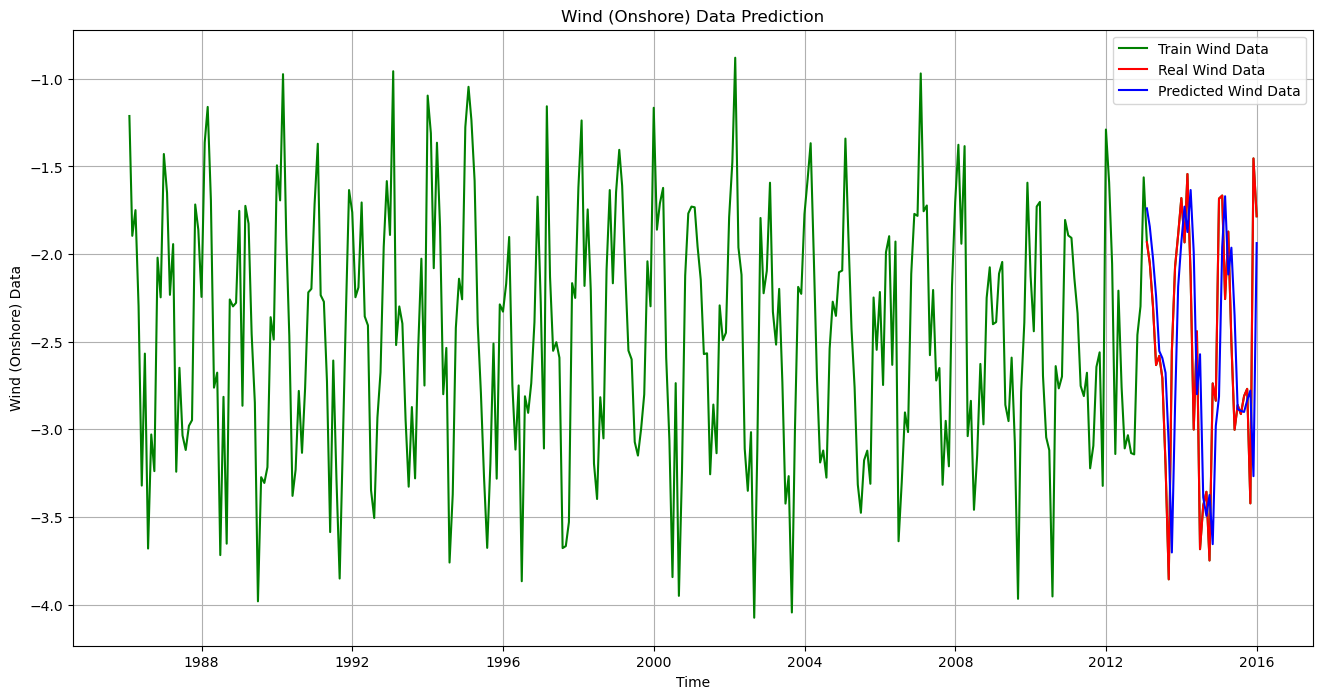

In [333]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df_selected['Date'], df_selected[NUTS2], color='green', label = 'Train Wind Data')
plt.plot(test_data['Date'], y, color = 'red', label = 'Real Wind Data')
plt.plot(test_data['Date'], predictions, color = 'blue', label = 'Predicted Wind Data')
plt.title('Wind (Onshore) Data Prediction')
plt.xlabel('Time')
plt.ylabel('Wind (Onshore) Data')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'AR Model, RSS: 141.1661')

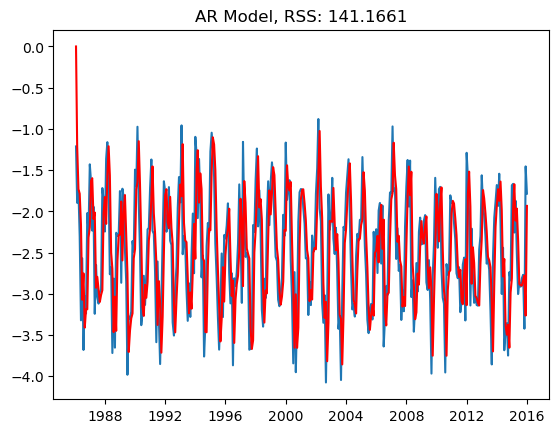

In [334]:
from statsmodels.tsa.arima.model import ARIMA
# freq = 'MS' > The frequency of the time-series MS = calendar month begin
# The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use
model = ARIMA(df_selected[NUTS2], order=(1,1, 0))  
results_AR = model.fit()# If disp < 0 convergence information will not be printed
plt.plot(df_selected['Date'],df_selected[NUTS2])
plt.plot(df_selected['Date'],results_AR.fittedvalues, color='red')
plt.title('AR Model, RSS: %.4f'% sum((results_AR.fittedvalues - df_selected[NUTS2])**2))



Text(0.5, 1.0, 'MA Model, RSS: 142.2222')

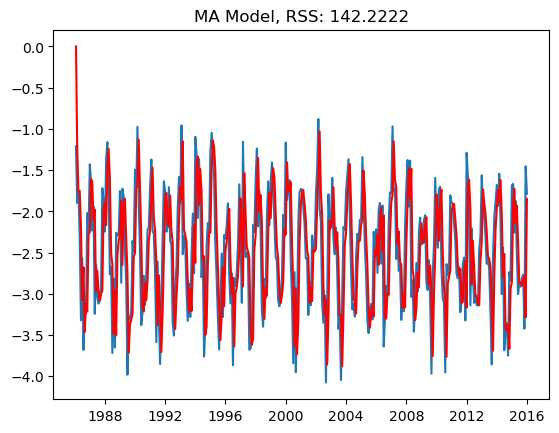

In [335]:
model = ARIMA(df_selected[NUTS2], order=(0, 1,1))   
results_MA = model.fit()  
plt.plot(df_selected['Date'],df_selected[NUTS2])
plt.plot(df_selected['Date'],results_MA.fittedvalues, color='red')
plt.title('MA Model, RSS: %.4f'% sum((results_MA.fittedvalues - df_selected[NUTS2])**2))

Text(0.5, 1.0, 'Combined Model, RSS: 141.0905')

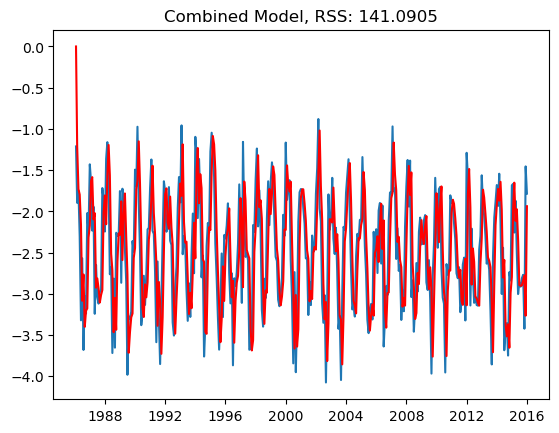

In [336]:
model = ARIMA(df_selected[NUTS2], order=(1,1,1))   
results_ARIMA = model.fit()  
plt.plot(df_selected['Date'],df_selected[NUTS2])
plt.plot(df_selected['Date'],results_ARIMA.fittedvalues, color='red')
plt.title('Combined Model, RSS: %.4f'% sum((results_ARIMA.fittedvalues - df_selected[NUTS2])**2))

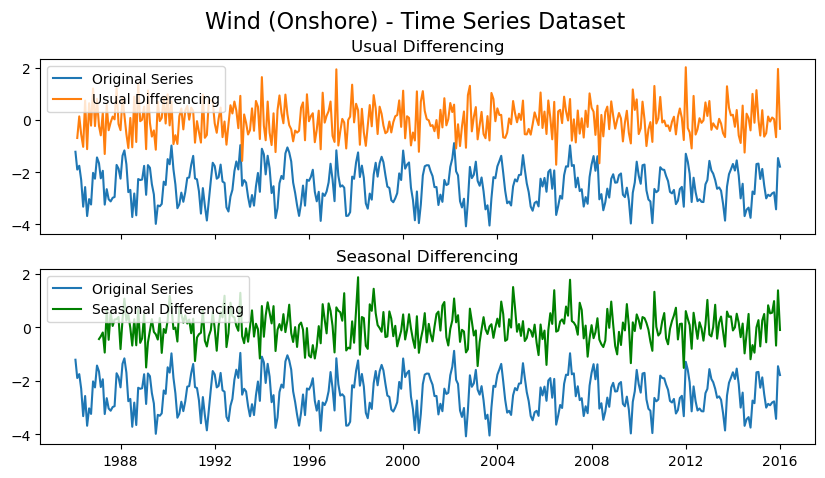

In [337]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_selected['Date'],df_selected[NUTS2], label='Original Series')
axes[0].plot(df_selected['Date'],df_selected[NUTS2].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(df_selected['Date'],df_selected[NUTS2], label='Original Series')
axes[1].plot(df_selected['Date'],df_selected[NUTS2].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Wind (Onshore) - Time Series Dataset', fontsize=16)
plt.show()

In [338]:
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)



print(model.summary())



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.86 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4958.812, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4352.153, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4736.455, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4226.291, Time=0.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.75 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4437.573, Time=0.37 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4094.416, Time=0.85 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4222.828, Time=0.45 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.90 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.02 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=4042.057, Time=1.13 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=4176.1

In [339]:
print(model.aic())

3966.3635239031873


In [340]:
# For the Test: we'll need to chop off a portion of our latest data, say from 2016, Jan.
test = test_data

# Fore the Train: we'll train on the rest of the data after split the test portion
train = train_data

print(model.fit(train_data[NUTS2]))

 ARIMA(2,1,2)(2,1,0)[12]          


In [341]:
future_forecast = model.predict(n_periods=49)
print(future_forecast)

324   -1.849637
325   -2.127649
326   -2.260175
327   -2.693393
328   -2.758182
329   -3.105952
330   -3.305972
331   -3.071177
332   -2.761130
333   -2.683799
334   -2.372046
335   -1.689270
336   -1.713289
337   -2.199601
338   -2.501540
339   -2.642638
340   -2.718290
341   -3.035711
342   -3.138295
343   -3.169674
344   -2.796432
345   -2.634876
346   -2.635090
347   -1.570572
348   -1.679256
349   -2.182007
350   -2.613408
351   -2.559966
352   -2.718454
353   -3.129774
354   -3.132113
355   -3.169650
356   -2.884148
357   -2.630670
358   -2.418146
359   -1.642803
360   -1.734196
361   -2.203597
362   -2.444101
363   -2.664608
364   -2.722152
365   -3.121902
366   -3.185966
367   -3.164193
368   -2.807713
369   -2.677010
370   -2.466889
371   -1.660952
372   -1.706422
dtype: float64


          Date      DE71  Prediction
324 2013-01-31 -1.932357   -1.849637
325 2013-02-28 -2.051548   -2.127649
326 2013-03-31 -2.298079   -2.260175
327 2013-04-30 -2.633407   -2.693393
328 2013-05-31 -2.580849   -2.758182
329 2013-06-30 -2.708050   -3.105952
330 2013-07-31 -3.206852   -3.305972
331 2013-08-31 -3.855582   -3.071177
332 2013-09-30 -2.553614   -2.761130
333 2013-10-31 -2.073524   -2.683799
334 2013-11-30 -1.888711   -2.372046
335 2013-12-31 -1.680622   -1.689270
336 2014-01-31 -1.933249   -1.713289
337 2014-02-28 -1.543282   -2.199601
338 2014-03-31 -2.127007   -2.501540
339 2014-04-30 -3.001080   -2.642638
340 2014-05-31 -2.440735   -2.718290
341 2014-06-30 -3.683560   -3.035711
342 2014-07-31 -3.433987   -3.138295
343 2014-08-31 -3.356101   -3.169674
344 2014-09-30 -3.747922   -2.796432
345 2014-10-31 -2.737845   -2.634876
346 2014-11-30 -2.836452   -2.635090
347 2014-12-31 -1.683397   -1.570572
348 2015-01-31 -1.666008   -1.679256
349 2015-02-28 -2.256520   -2.182007
3

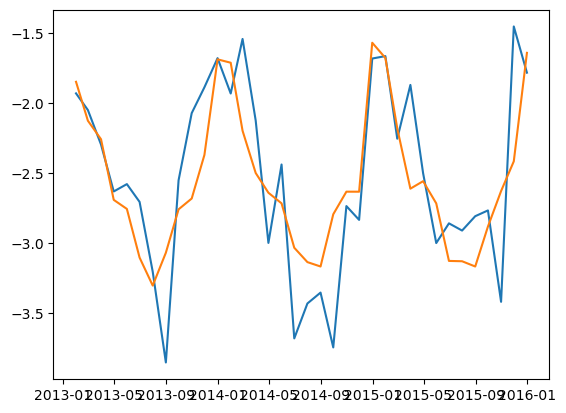

In [342]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['Prediction'])
joined_df = pd.concat([test_data, future_forecast], axis=1)

print(joined_df)

plt.plot(joined_df['Date'],joined_df[NUTS2], label='Original Series')
plt.plot(joined_df['Date'],joined_df['Prediction'], label='Prediction')


Text(0.5, 1.0, 'Logarithmus of monthly wind power generation time series (onshore) for NUTS2 level: DE71')

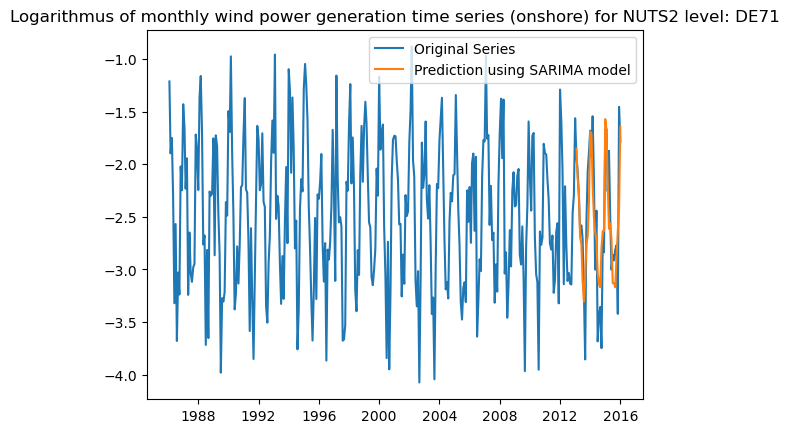

In [363]:
joined_df = pd.concat([df_selected,future_forecast],axis=1)

plt.plot(df_selected['Date'],joined_df[NUTS2], label='Original Series')
plt.plot(joined_df['Date'],joined_df['Prediction'], label='Prediction using SARIMA model')
plt.legend()
plt.title('Logarithmus of monthly wind power generation time series (onshore) for NUTS2 level: DE71')

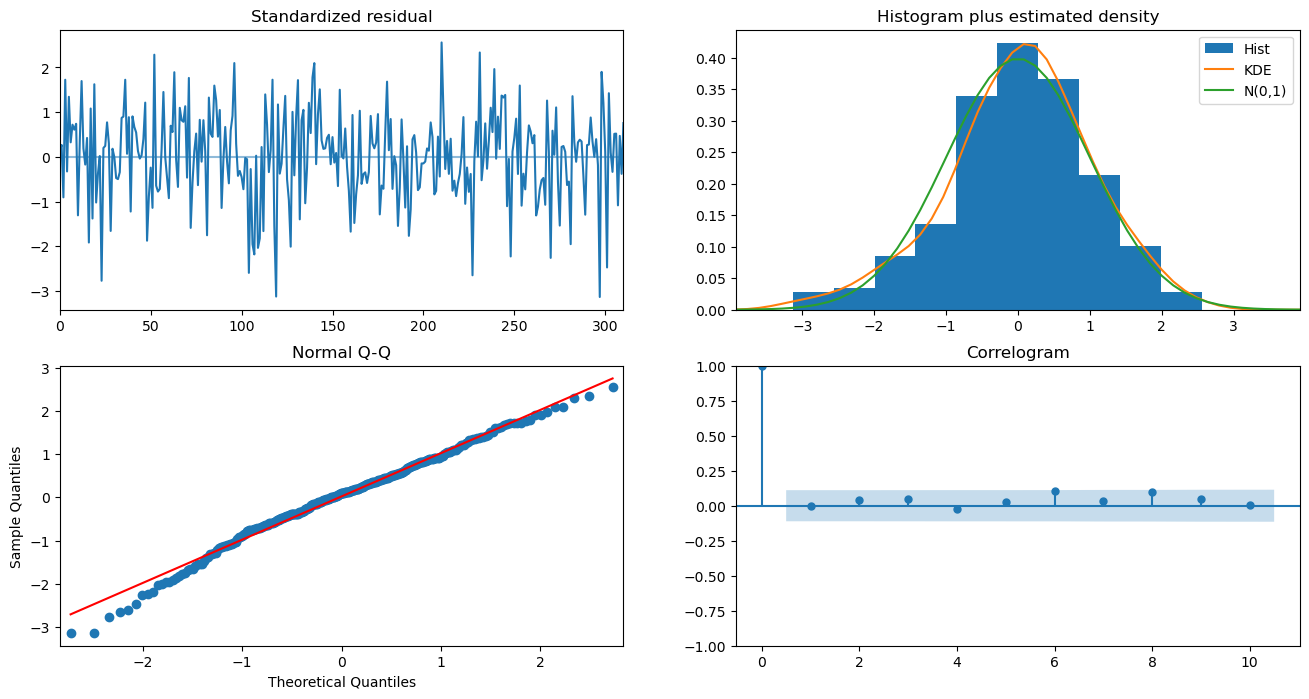

In [344]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [345]:
ts = df_selected

train = ts[:-60].copy()
val = ts[-60:-12].copy()
test = ts[-12:].copy()


In [346]:
def measure_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [348]:
def check_stationarity(y, lags_plots=100, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Monthly Wind (Onshore) Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(np.sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

C:\Users\Anwender\AppData\Local\Temp\ipykernel_14412\2051648593.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -4.1289
p-value                          0.0009
Lags Used                       16.0000
Number of Observations Used    283.0000
Critical Value (1%)             -3.4537
Critical Value (5%)             -2.8718
Critical Value (10%)            -2.5722
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


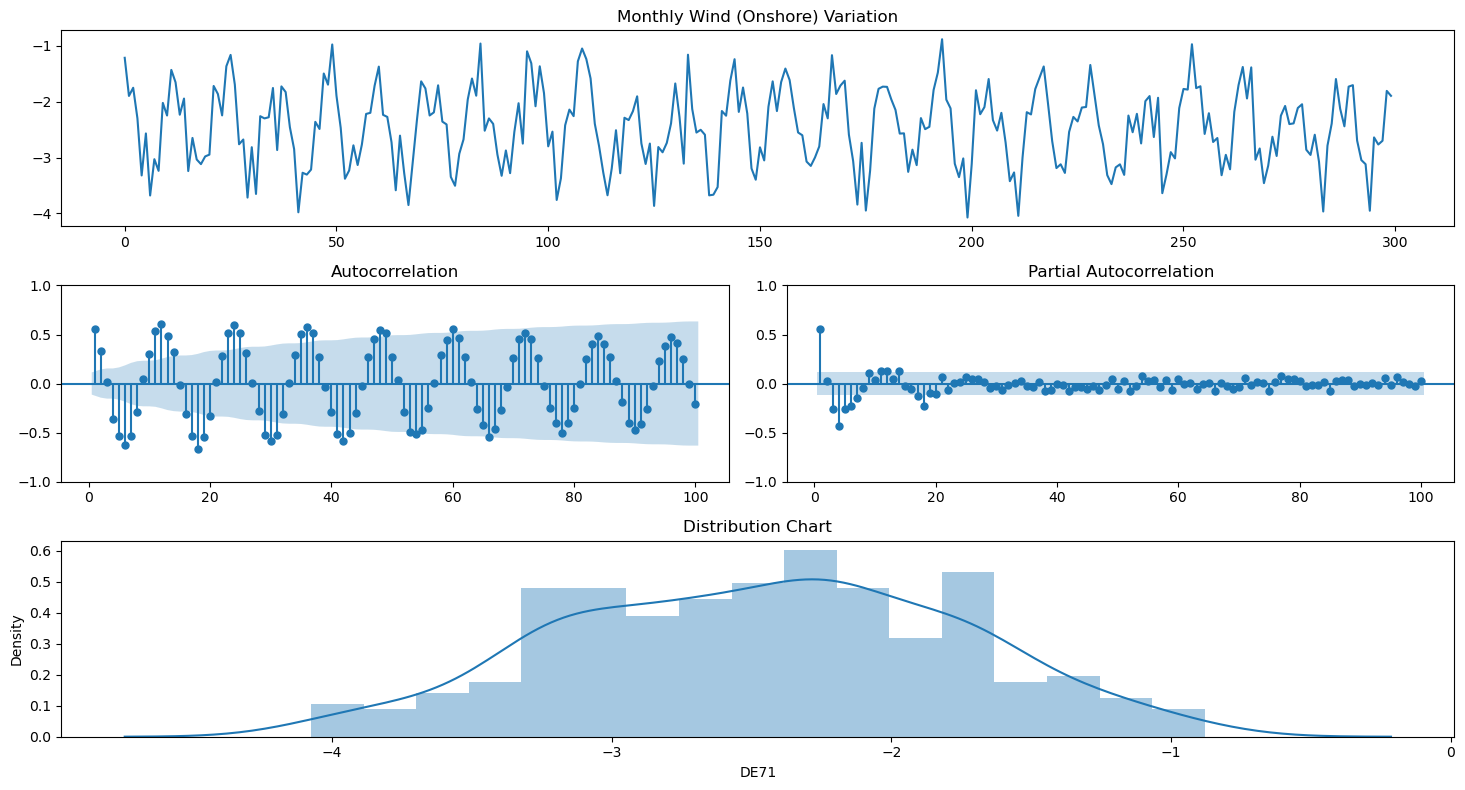

In [349]:
check_stationarity(train[NUTS2])

C:\Users\Anwender\AppData\Local\Temp\ipykernel_14412\2051648593.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -7.4673
p-value                          0.0000
Lags Used                       11.0000
Number of Observations Used    276.0000
Critical Value (1%)             -3.4543
Critical Value (5%)             -2.8721
Critical Value (10%)            -2.5724
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


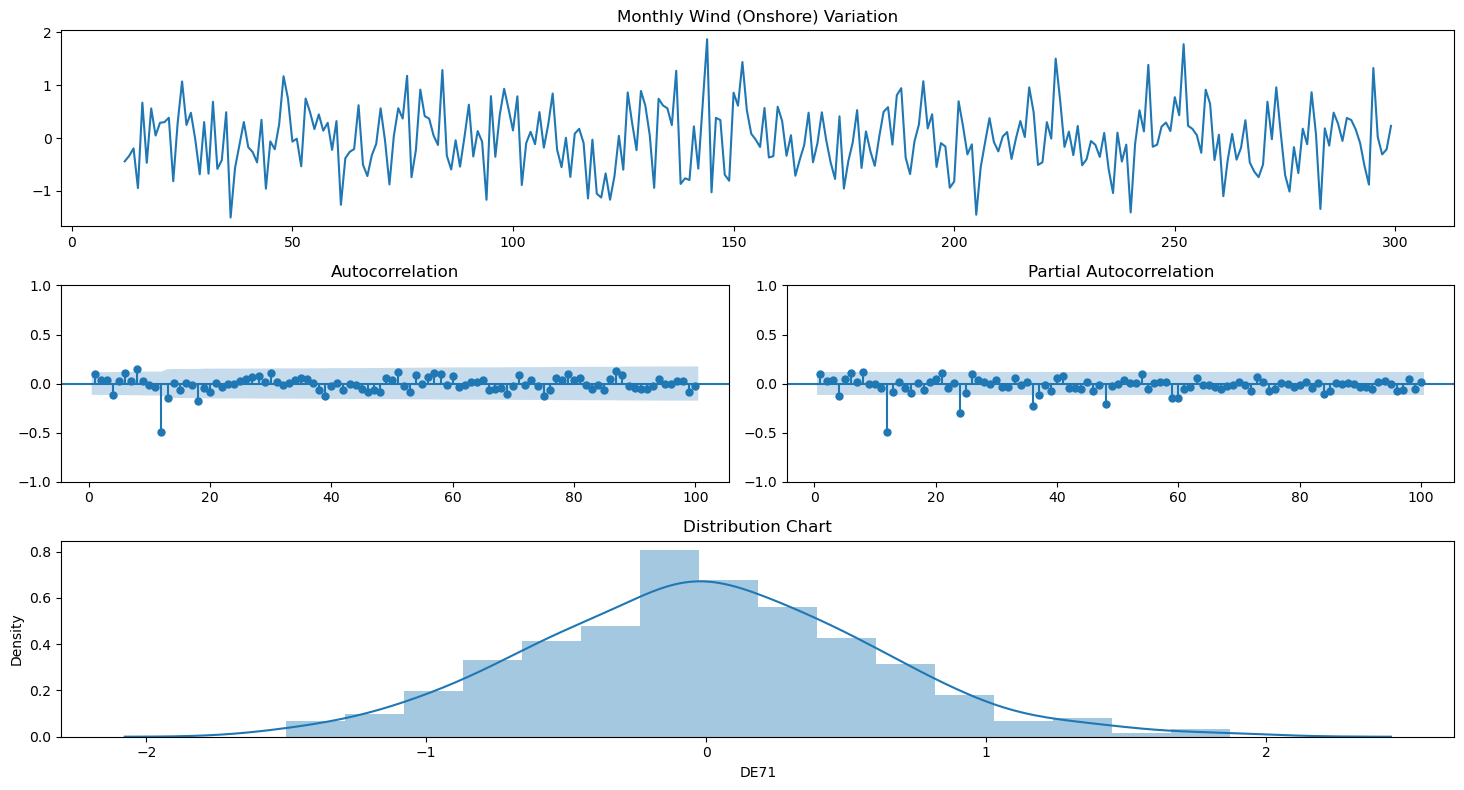

In [350]:
check_stationarity(train[NUTS2].diff(12).dropna())

In [351]:
train = df_selected[:-60].copy()
val = df_selected[-60:-12].copy()
test = df_selected[-12:].copy()

In [352]:
def measure_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [353]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Rio de Janeiro Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(np.sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

C:\Users\Anwender\AppData\Local\Temp\ipykernel_14412\3252846299.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -4.1289
p-value                          0.0009
Lags Used                       16.0000
Number of Observations Used    283.0000
Critical Value (1%)             -3.4537
Critical Value (5%)             -2.8718
Critical Value (10%)            -2.5722
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


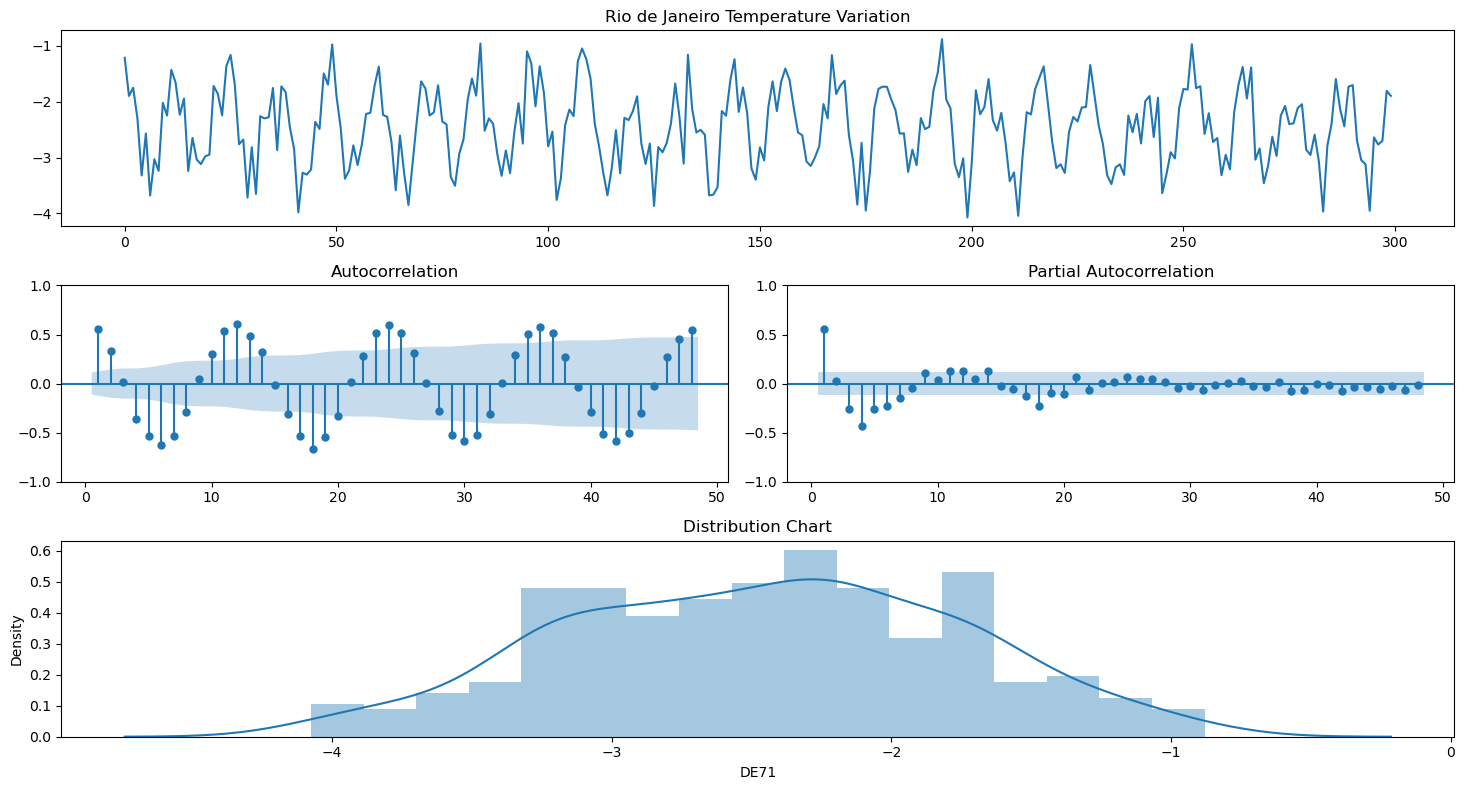

In [354]:
# The first approach is to check the series without any transformation
check_stationarity(train[NUTS2])

C:\Users\Anwender\AppData\Local\Temp\ipykernel_14412\3252846299.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -9.0219
p-value                          0.0000
Lags Used                       11.0000
Number of Observations Used    276.0000
Critical Value (1%)             -3.4543
Critical Value (5%)             -2.8721
Critical Value (10%)            -2.5724
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


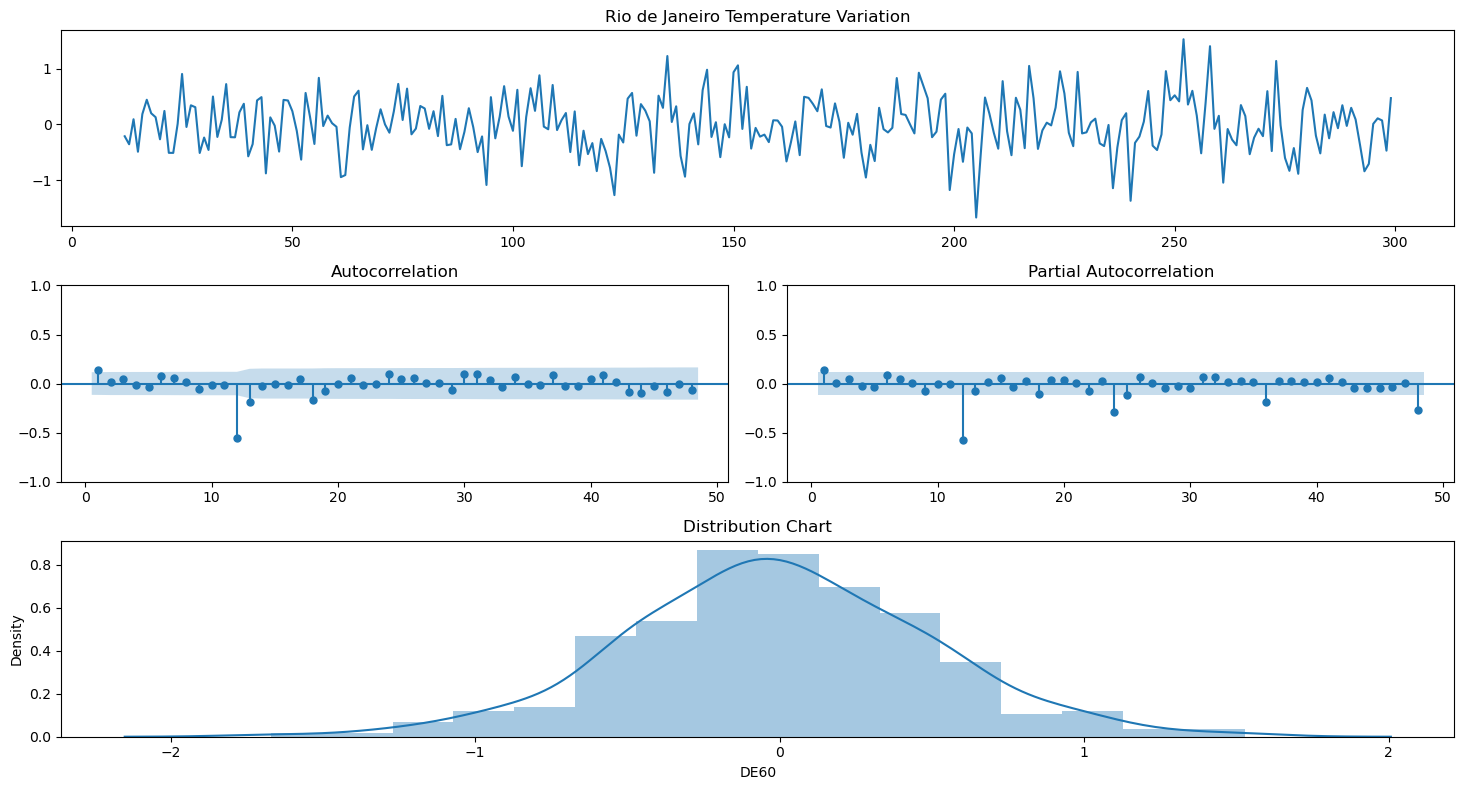

In [287]:
check_stationarity(train[NUTS2].diff(12).dropna())

In [355]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[300+week])
        
    return prediction

In [356]:
# Let's test it in the validation set
#print(train)
#print(val)
val['Pred'] = walk_forward(train[NUTS2], val[NUTS2], ((0,0,0),(1,1,0,12),'c'))

In [357]:
# Measuring the error of the prediction
rmse_pred = measure_rmse(val[NUTS2], val['Pred'])

print(f"The RMSE of the SARIMA(1,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)}")
# Creating the error column
val['Error'] = val[NUTS2] - val['Pred']

print(val)

The RMSE of the SARIMA(1,0,0),(0,1,1,12),'c' model was 0.4999
          Date      DE71      Pred     Error
300 2011-01-31 -1.907714 -2.422484  0.514771
301 2011-02-28 -2.137676 -1.929386 -0.208290
302 2011-03-31 -2.337711 -1.883502 -0.454209
303 2011-04-30 -2.752002 -2.788158  0.036155
304 2011-05-31 -2.810190 -3.007436  0.197246
305 2011-06-30 -2.677036 -2.858918  0.181882
306 2011-07-31 -3.222107 -3.513691  0.291584
307 2011-08-31 -3.093950 -3.325389  0.231439
308 2011-09-30 -2.643668 -2.782547  0.138879
309 2011-10-31 -2.560604 -2.547558 -0.013046
310 2011-11-30 -3.322386 -1.702822 -1.619564
311 2011-12-31 -1.289460 -2.022346  0.732886
312 2012-01-31 -1.591376 -2.184463  0.593086
313 2012-02-29 -2.056264 -1.939710 -0.116554
314 2012-03-31 -3.140572 -2.026941 -1.113631
315 2012-04-30 -2.208791 -2.734647  0.525856
316 2012-05-31 -2.760533 -2.935138  0.174606
317 2012-06-30 -3.108528 -2.903320 -0.205208
318 2012-07-31 -3.033200 -3.592299  0.559099
319 2012-08-31 -3.135365 -2.878175 -0.

In [366]:
from statsmodels.graphics.gofplots import qqplot
def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0],data.iloc[:,1:3])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,2], data.iloc[:,3])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    ## QQ Plot of the residual
    qqplot(data.iloc[:,3], line='r', ax=ax3)
    ax3.set_title('Q-Q-Plot of residual')
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,3], lags=(len(data.iloc[:,3])-1),zero=False, ax=ax4)
    ax4.set_title('Autocorrelation of residual')
    plt.tight_layout()
    plt.show()

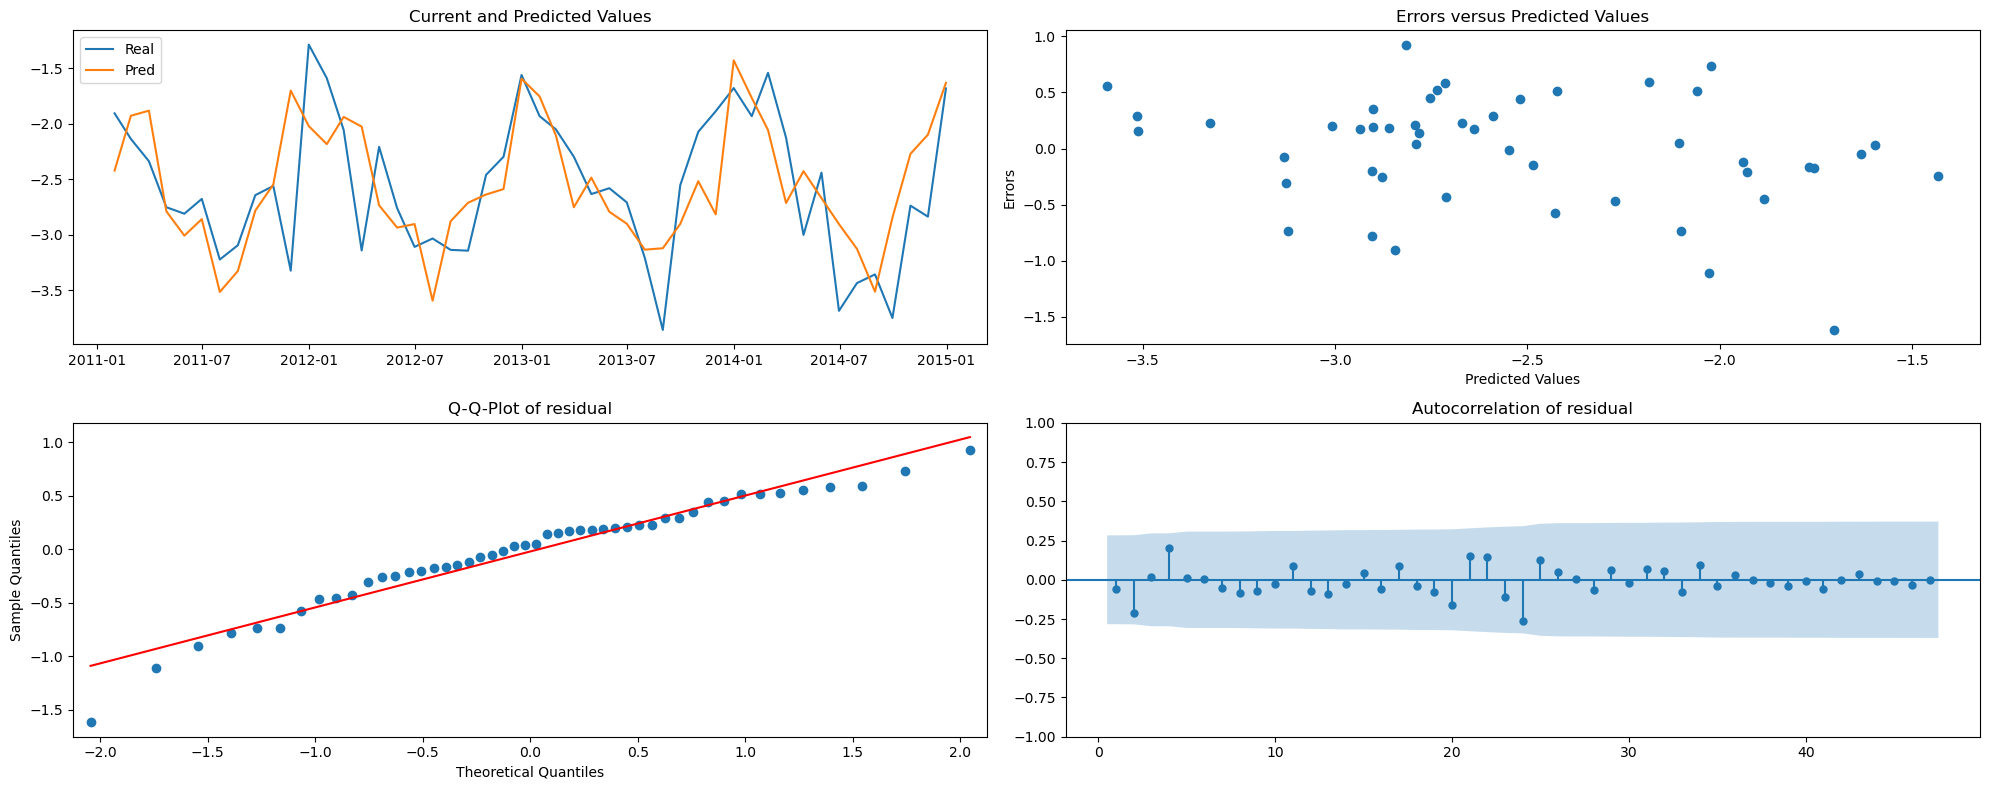

In [367]:
plot_error(val)